In [3]:
col = 'crim	zn	indus	chas	nox	rm	age	dis	rad	tax	ptratio	b	lstat	medv'.split()
len(col)

14

#### Price 예측 - 다항회귀
- 데이터셋 : hosing.csv
- 학습종류 : 지도학습 / 회귀Regression - 값을 예측
- 알고리즘 : 선형회귀, 다항회귀, knn
- 피쳐 : lstat
- 타겟: medv



In [4]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화
from sklearn.neighbors import KNeighborsRegressor
                                #knn
from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
                            ## 정규화, 컬럼추가

In [5]:
houseDict = {x:[] for x in col}

In [6]:
houseDF = pd.DataFrame(pd.read_csv('../data/housing.csv', header=None))
for i in houseDF.index:
    for j in range(14):
        houseDict[col[j]].append(houseDF.iloc[i,:][0].split()[j])
    
# houseDF.iloc[1,:]

In [7]:
houDF = pd.DataFrame(houseDict)
houDF = houDF.astype(float)
houDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
### 데이터 시각화

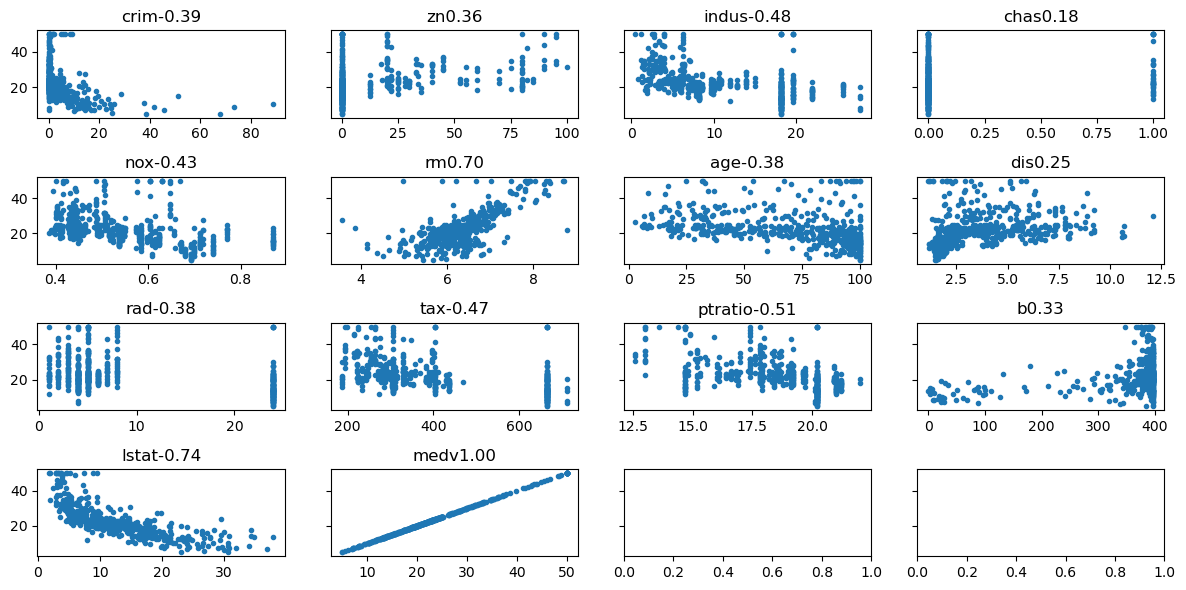

In [9]:
fig, ax = plt.subplots(4,4, sharey=True,figsize = (12,6))
ax = ax.flatten()
# print(ax[0])
for i in range(0,14):
    ax[i].plot(houDF.iloc[:,i],houDF['medv'], '.')
    ax[i].set_title(houDF.columns[i]+ str(f"{houDF.iloc[:,i].corr(houDF['medv']):.2f}"))

plt.tight_layout()
plt.show()    


In [10]:
featureDF = houDF[['lstat']]
targetSR = houDF['medv']
## 1개이므로 민맥스필요없음

[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [11]:
## 3-2 데이터셋 분리 => 학습용 : 테스트용 75:25 (default ratio)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size =0.25,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (379, 1) / X_test => 2D, (127, 1)
y_train => 1D (379,) / y_test => 2D, (127,)


[4] 학습 진행

In [12]:
kn =  KNeighborsRegressor()
lr = LinearRegression()
pl = PolynomialFeatures() 

kn.fit(X_train,y_train)
lr.fit(X_train,y_train)
pl.fit(X_train,y_train)

PolynomialFeatures()

knn부터

In [13]:
print(kn.n_features_in_)
print(kn.n_samples_fit_)
# print(kn.feature_names_in_)
print(kn.effective_metric_)
#거리 재는 방법

1
379
euclidean


In [14]:
featureDF.mean()

lstat    12.653063
dtype: float64

In [15]:
distance, indices = kn.kneighbors([[12]])
indices = indices.reshape(-1)
y_train[indices].index.tolist()
idx = y_train[indices].index.tolist()
idx

c:\Users\kdt\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


KeyError: '[201] not in index'

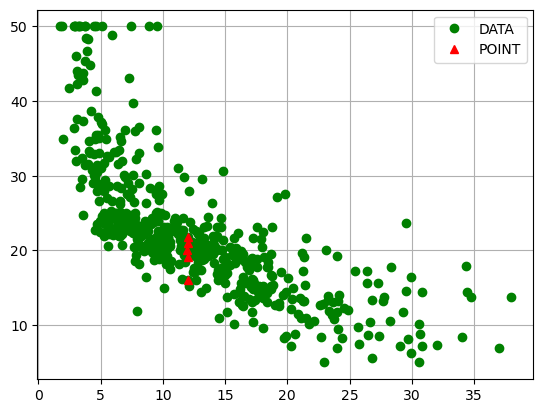

In [ ]:
## 무게와 길이의 분포
plt.plot(featureDF, targetSR,'og', label = 'DATA')
# plt.plot(X_train.iloc[0], y_train[0], '^b', label = 'POINT')
plt.plot(X_train.iloc[idx], y_train[indices], '^r', label = 'POINT')

plt.legend()
plt.grid()
plt.show()

In [ ]:
# 데이터 개수
train_data = X_train
train_label = y_train
DATANUMS = train_data.shape[0]

#k 갯수에 따른 모델 성능과 비용함수값 저장
HISTORY = [[],[]] # [score_list, rmse_list]
HISTORY = {'score':[], 'rmse':[]}

# k 갯수에 따른 모델 성능 및 비용 계산
for k in range(1, DATANUMS+1):
    #KNR 인스턴스 생성
    model = KNeighborsRegressor(n_neighbors=k)
    
    #KNR 학습 및 예측
    model.fit(train_data, train_label)
    pre_ = model.predict(train_data)
    
    #KNR 성능평가 및 비용계산
    score = model.score(train_data, train_label)
    rmse = root_mean_squared_error(train_label, pre_)
    #저장
    HISTORY['score'].append(score)
    HISTORY['rmse'].append(rmse)
    
    
print(HISTORY)

{'score': [0.9446717440220795, 0.8562983478056413, 0.7849975653833453, 0.750672196065349, 0.7476187198612351, 0.73763632271645, 0.731671297349532, 0.7295623458053979, 0.7241371436347966, 0.7156003266656403, 0.7086089011493915, 0.7036627635326526, 0.7026856056602059, 0.702569120269052, 0.7013821181659484, 0.6959257253044324, 0.6963559319609957, 0.6958659516512824, 0.695536198984831, 0.6920264923488982, 0.6912739332549442, 0.6894347671003139, 0.6880959119983086, 0.6871476223996671, 0.6861929089030153, 0.6859555980560137, 0.6892374361243916, 0.6895455285125891, 0.6881018638408105, 0.6886628793293562, 0.6898459146453021, 0.6894005930631699, 0.6890031578441311, 0.6883508820587665, 0.6859034051636543, 0.6852702327835841, 0.6844851585908754, 0.6828213598118238, 0.6809455747857375, 0.6804039231941124, 0.6785892578379834, 0.6775135166363544, 0.6761155275667984, 0.6735290596166124, 0.6737954367098093, 0.6735593860211048, 0.6712560858599671, 0.6693459509737751, 0.6671049777642907, 0.6654614332198

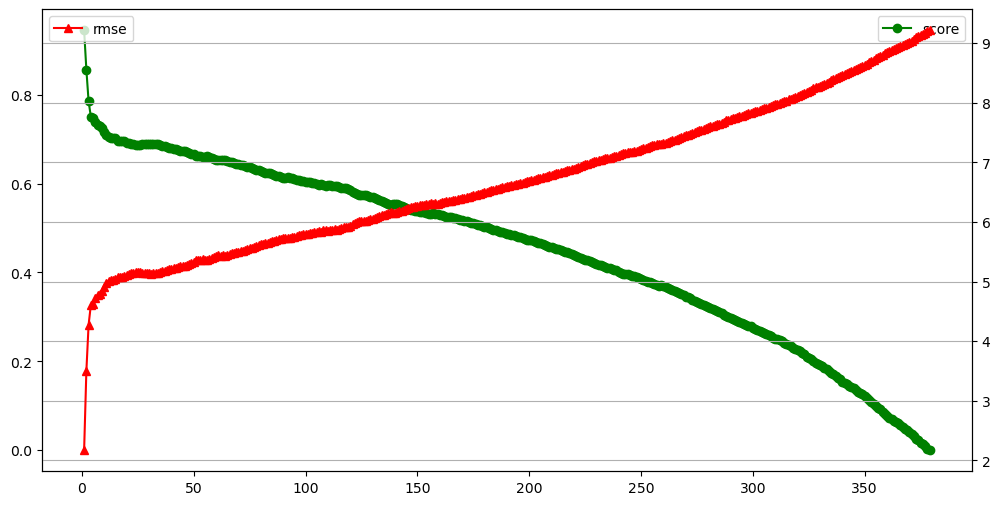

In [ ]:
## 무게와 길이의 분포
fig, ax = plt.subplots(figsize= (12,6))
ax.plot(range(1, DATANUMS+1), HISTORY['score'],'og-', label = 'score')
# for i in range(1, DATANUMS+1):
#     ax.text(i, HISTORY['score'][i-1], str(i))
# score 0~1 1이 이상적
ax2 = plt.twinx(ax)
ax2.plot(range(1, DATANUMS+1), HISTORY['rmse'],'^r-', label = 'rmse')
# for i in range(1, DATANUMS+1):
#     ax2.text(i, HISTORY['rmse'][i-1], str(i))
    

# rmse 0~1 0이 이상적
# plt.xlabel('k')
# plt.ylabel('rmse')
ax.legend()
ax2.legend()
plt.grid()
plt.show()

In [ ]:
print('SCORE', min(HISTORY['score']), max(HISTORY['score']))
print('RMSE', min(HISTORY['rmse']), max(HISTORY['rmse']))

SCORE 0.0 0.9446717440220795
RMSE 2.1681369749055306 9.217501679723062


In [ ]:
test_data =  X_test
test_label = y_test
    #KNR 인스턴스 생성
model = KNeighborsRegressor(n_neighbors=5)

#KNR 학습 및 예측
model.fit(test_data, test_label)
pre_ = model.predict(test_data)

#KNR 성능평가 및 비용계산
score = model.score(test_data, test_label)
rmse = root_mean_squared_error(test_label, pre_)

print(score, rmse)

0.760234095771368 4.447658501024137


In [ ]:
## 모듈화
knn_dict = {x:[] for x in ['score', 'r2score','rmse', 'mse', 'mae']}
for x, y in [[X_train,  y_train], [X_test, y_test]]:
    score = kn.score(x, y)
    pre_y = kn.predict(x)
    r2score = r2_score(y, pre_y)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    knn_dict['score'].append(score)
    knn_dict['r2score'].append(r2score)
    knn_dict['rmse'].append(rmse)
    knn_dict['mse'].append(mse)
    knn_dict['mae'].append(mae)

knn_dict    
    

{'score': [0.7476187198612351, 0.6191070698616488],
 'r2score': [0.7476187198612351, 0.6191070698616488],
 'rmse': [4.630648273198814, 5.605820372366928],
 'mse': [21.442903430079156, 31.425222047244084],
 'mae': [3.261477572559367, 4.206929133858267]}

In [ ]:
knnDF = pd.DataFrame(knn_dict, index=['train', 'test'])
knnDF.loc['diff'] = (knnDF.loc['train']-knnDF.loc['test']).abs()
knnDF.round(4)

,score,r2score,rmse,mse,mae
train,0.7476,0.7476,4.6306,21.4429,3.2615
test,0.6191,0.6191,5.6058,31.4252,4.2069
diff,0.1285,0.1285,0.9752,9.9823,0.9455


선형회귀

In [ ]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"lr.coef_ {lr.coef_}")
print(f"lr.intercept_ {lr.intercept_}")
print(f"X_train = {lr.coef_[0]}*y_train + {lr.intercept_}")

lr.coef_ [-0.96170137]
lr.intercept_ 34.73151000394647
X_train = -0.9617013730476832*y_train + 34.73151000394647


In [ ]:
## 모듈화
lr_dict = {x:[] for x in ['score', 'r2score','rmse', 'mse', 'mae']}
for x, y in [[X_train,  y_train], [X_test, y_test]]:
    score = lr.score(x, y)
    pre_y = lr.predict(x)
    r2score = r2_score(y, pre_y)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    lr_dict['score'].append(score)
    lr_dict['r2score'].append(r2score)
    lr_dict['rmse'].append(rmse)
    lr_dict['mse'].append(mse)
    lr_dict['mae'].append(mae)

lr_dict    
    

{'score': [0.554892502859145, 0.5091098695218071],
 'r2score': [0.554892502859145, 0.5091098695218071],
 'rmse': [6.149583178502135, 6.363995618316171],
 'mse': [37.81737326931641, 40.50044022994742],
 'mae': [4.450732830213591, 4.7264924719649315]}

In [ ]:
lrDF = pd.DataFrame(lr_dict, index=['train', 'test'])
lrDF.loc['diff'] = (lrDF.loc['train']-lrDF.loc['test']).abs()
lrDF.round(4)

,score,r2score,rmse,mse,mae
train,0.5549,0.5549,6.1496,37.8174,4.4507
test,0.5091,0.5091,6.3640,40.5004,4.7265
diff,0.0458,0.0458,0.2144,2.6831,0.2758


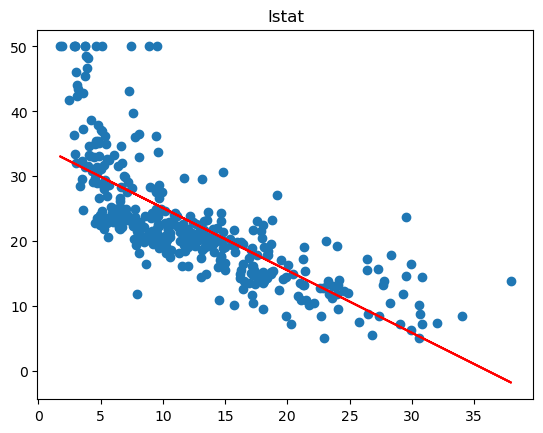

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize = (10, 5), sharey=True)
y = X_train*lr.coef_[0]+lr.intercept_
plt.plot(X_train, y_train, 'o', label='Fish')
plt.plot(X_train,y, 'r-', label='Poly Line')
plt.title('lstat')

plt.show()

다중항

In [ ]:
pl_train = pl.transform(X_train)
pl_test  = pl.transform(X_test)

In [ ]:
print(f'학습용 {type(pl_train)}, {pl_train.shape}')
print(f'테스트용 {type(pl_test)}, {pl_test.shape}')

학습용 <class 'numpy.ndarray'>, (379, 3)
테스트용 <class 'numpy.ndarray'>, (127, 3)


In [ ]:
## - 선형회귀인스턴스 생성
plModel = LinearRegression()
## - 재학습
plModel.fit(pl_train, y_train)

LinearRegression()

In [ ]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"polyModel.coef_ {plModel.coef_}")
print(f"plModel.intercept_ {plModel.intercept_}")
print(f"X_train = {plModel.coef_[0]}*y_train + {plModel.intercept_}")

polyModel.coef_ [ 0.         -2.29341156  0.04278826]
plModel.intercept_ 42.516461807992215
X_train = 0.0*y_train + 42.516461807992215


In [ ]:
print( "min :", X_train.min().values[0], "max :", X_train.max().values[0] )
min_x, max_x = X_train.min().values[0], X_train.max().values[0]
# minmax 해서 0~1
## - 곡선 회귀식에 대입할 데이터 
x=np.linspace(min_x, max_x)  # 1<= ~ <=42 범위에서 균등하게 50개[기본값] 데이터 생성 
print('shape :' , x.shape)
print(x)

min : 1.73 max : 37.97
shape : (50,)
[ 1.73        2.46959184  3.20918367  3.94877551  4.68836735  5.42795918
  6.16755102  6.90714286  7.64673469  8.38632653  9.12591837  9.8655102
 10.60510204 11.34469388 12.08428571 12.82387755 13.56346939 14.30306122
 15.04265306 15.7822449  16.52183673 17.26142857 18.00102041 18.74061224
 19.48020408 20.21979592 20.95938776 21.69897959 22.43857143 23.17816327
 23.9177551  24.65734694 25.39693878 26.13653061 26.87612245 27.61571429
 28.35530612 29.09489796 29.8344898  30.57408163 31.31367347 32.05326531
 32.79285714 33.53244898 34.27204082 35.01163265 35.75122449 36.49081633
 37.23040816 37.97      ]


In [ ]:
## - 곡선 회귀식 : y = x^0*W0 + x^1*W1 x^2*W2 + b
y = (1*plModel.coef_[0]) + (x * plModel.coef_[1]) + ((x**2)*plModel.coef_[2]) + plModel.intercept_

print('shape :' , y.shape)
print(y)

shape : (50,)
[38.6769208  37.11363198 35.59715319 34.12748443 32.70462569 31.32857698
 29.99933829 28.71690963 27.48129099 26.29248238 25.15048379 24.05529523
 23.00691669 22.00534818 21.05058969 20.14264123 19.2815028  18.46717439
 17.699656   16.97894764 16.30504931 15.677961   15.09768271 14.56421446
 14.07755622 13.63770801 13.24466983 12.89844167 12.59902354 12.34641543
 12.14061735 11.9816293  11.86945126 11.80408326 11.78552528 11.81377732
 11.88883939 12.01071149 12.17939361 12.39488575 12.65718793 12.96630012
 13.32222234 13.72495459 14.17449686 14.67084916 15.21401148 15.80398383
 16.4407662  17.1243586 ]


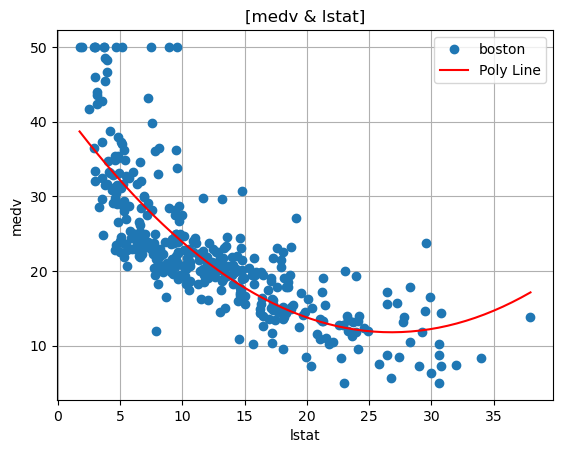

In [ ]:
## 시각화 및 회귀선 -----------------------------------
## 데이터 시각화
plt.plot(X_train, y_train, 'o', label='boston')

# 선형회귀에서 구한 y=model.coef_*x+model.intercept_ 공식의 직선 긋기
plt.plot(x, y, 'r-', label='Poly Line')

plt.xlabel('lstat')
plt.ylabel('medv')
plt.title('[medv & lstat]')
plt.legend()
plt.grid()
plt.show()

In [ ]:
## 모듈화
pl_dict = {x:[] for x in ['score', 'r2score','rmse', 'mse', 'mae']}
for x, y in [[pl_train, y_train], [pl_test, y_test]]:
    score = plModel.score(x, y)
    pre_y = plModel.predict(x)
    r2score = r2_score(y, pre_y)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    pl_dict['score'].append(score)
    pl_dict['r2score'].append(r2score)
    pl_dict['rmse'].append(rmse)
    pl_dict['mse'].append(mse)
    pl_dict['mae'].append(mae)

pl_dict    
    

{'score': [0.6378435823296646, 0.6475607932702786],
 'r2score': [0.6378435823296646, 0.6475607932702786],
 'rmse': [5.547040263323857, 5.3923718047017015],
 'mse': [30.76965568293601, 29.07767368014189],
 'mae': [4.027465151922944, 4.034861972063669]}

In [ ]:
plDF = pd.DataFrame(pl_dict, index=['ptrain', 'ptest'])
plDF.loc['diff'] = (plDF.loc['ptrain']-plDF.loc['ptest']).abs()
plDF.round(4)

,score,r2score,rmse,mse,mae
ptrain,0.6378,0.6378,5.5470,30.7697,4.0275
ptest,0.6476,0.6476,5.3924,29.0777,4.0349
diff,0.0097,0.0097,0.1547,1.6920,0.0074


In [ ]:
knnDF.round(4)

,score,r2score,rmse,mse,mae
train,0.7476,0.7476,4.6306,21.4429,3.2615
test,0.6191,0.6191,5.6058,31.4252,4.2069
diff,0.1285,0.1285,0.9752,9.9823,0.9455


In [ ]:
lrDF.round(4)

,score,r2score,rmse,mse,mae
train,0.5549,0.5549,6.1496,37.8174,4.4507
test,0.5091,0.5091,6.3640,40.5004,4.7265
diff,0.0458,0.0458,0.2144,2.6831,0.2758
